In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as apy
import ugradio

In [2]:
import time
time.time()

1676582665.1717098

In [3]:
apy.time?

In [4]:
local_now =ugradio.timing.local_time()
print(local_now)

Thu Feb 16 13:24:25 2023


In [5]:
print(local_now)

Thu Feb 16 13:24:25 2023


In [6]:
ugradio.timing?

In [7]:
import astropy.units as u
from astropy.coordinates import SkyCoord

In [8]:
def gal_to_hor(long, lat):
    gc = SkyCoord(l=long*u.degree, b=lat*u.degree, frame = 'galactic')
    

In [9]:
SkyCoord?

In [10]:
np.array([0.,0,0])

array([0., 0., 0.])

In [11]:
data = np.load('hydrogen_sample_3.npy')

In [12]:
data = data
print(data.shape)

(2048, 2048)


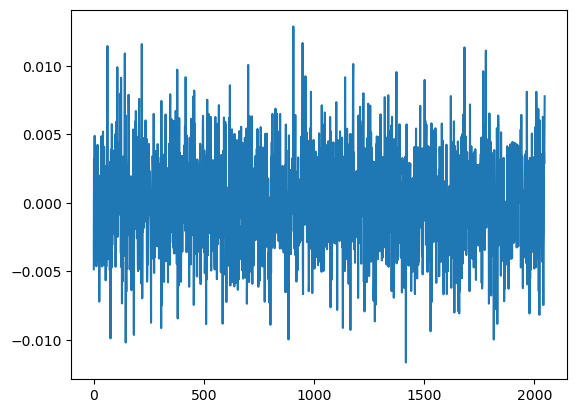

In [13]:
avg = np.average(data, axis = 0)
avg = avg - avg.mean()
plt.plot(avg)
plt.show()
#print(avg)

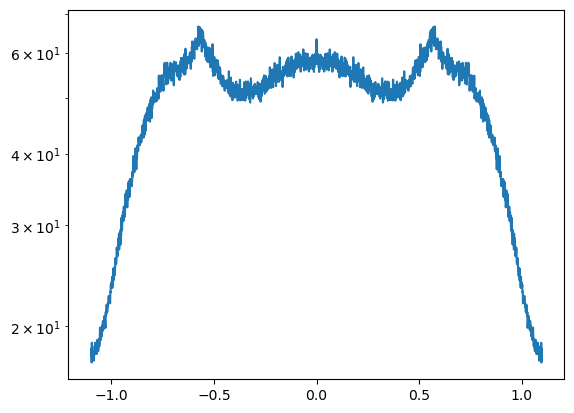

In [14]:
power = np.fft.fft(data)
power = np.fft.fftshift(power)
power = abs(power)**2
avg = np.average(power, axis = 0)
fft_freq = np.fft.fftshift(np.fft.fftfreq(2048,1/2.2))
plt.plot(fft_freq, avg)
plt.yscale('log')
plt.show()

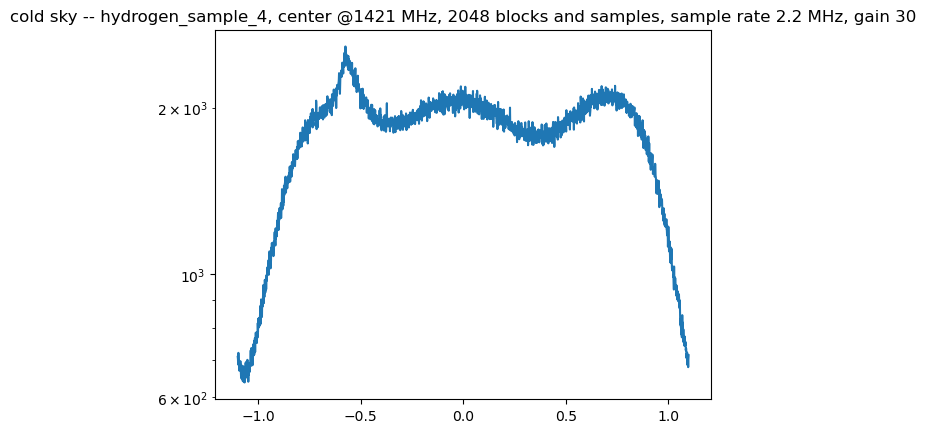

In [18]:
data = np.load('hydrogen_sample_4.npy')
power = np.fft.fft(data)
power = np.fft.fftshift(power)
power = abs(power)**2
avg_sky = np.average(power, axis = 0)
fft_freq = np.fft.fftshift(np.fft.fftfreq(2048,1/2.2))
plt.plot(fft_freq, avg_sky)
plt.yscale('log')
plt.title('cold sky -- hydrogen_sample_4, center @1421 MHz, 2048 blocks and samples, sample rate 2.2 MHz, gain 30')
plt.show()

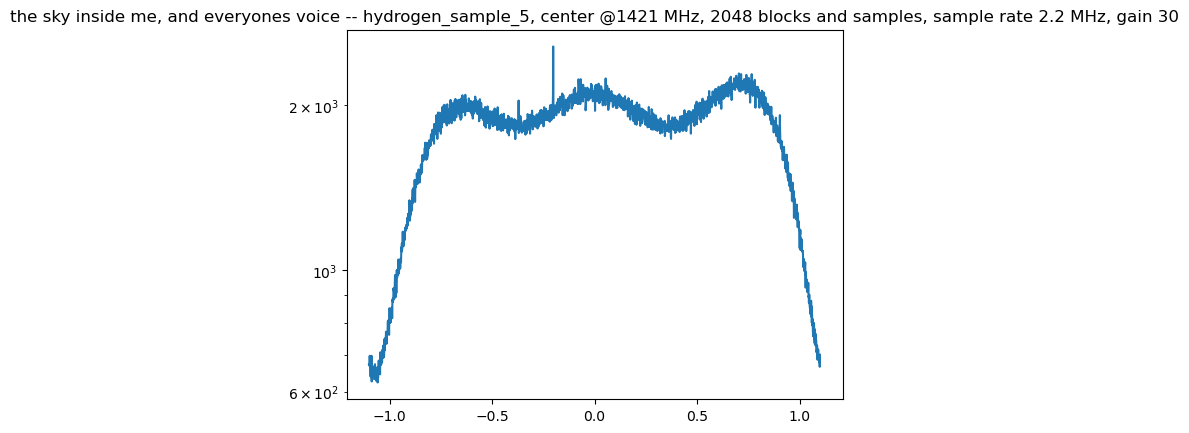

In [19]:
data = np.load('hydrogen_sample_5.npy')
power = np.fft.fft(data)
power = np.fft.fftshift(power)
power = abs(power)**2
avg_us = np.average(power, axis = 0)
fft_freq = np.fft.fftshift(np.fft.fftfreq(2048,1/2.2))
plt.plot(fft_freq, avg_us)
plt.yscale('log')
plt.title('the sky inside me, and everyones voice -- hydrogen_sample_5, center @1421 MHz, 2048 blocks and samples, sample rate 2.2 MHz, gain 30')
plt.show()

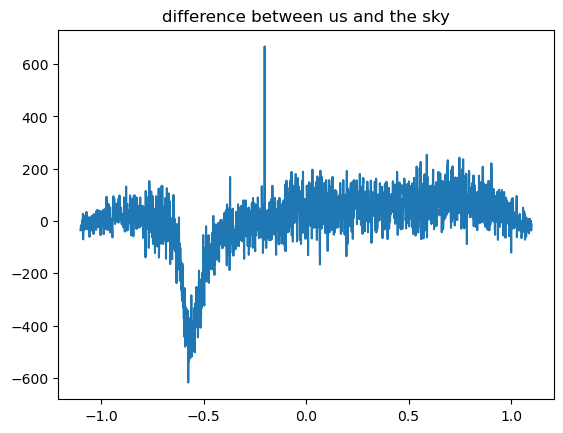

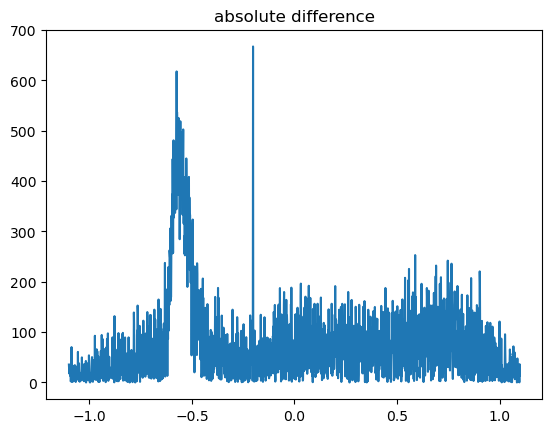

In [27]:
dif = (avg_us - avg_sky)
abs_dif = abs(dif)
plt.plot(fft_freq, dif)
#plt.yscale('symlog')
plt.title('difference between us and the sky')
plt.show()
plt.plot(fft_freq, abs_dif)
plt.title('absolute difference')
plt.show()

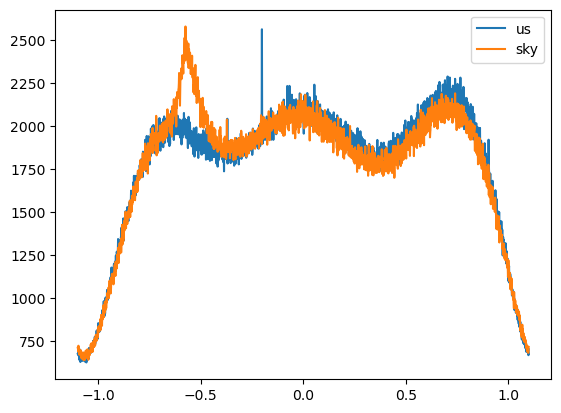

In [30]:

plt.plot(fft_freq, avg_us, label = 'us')
plt.plot(fft_freq, avg_sky, label = 'sky')
plt.legend()
plt.show()